# 1. Support Vector Machines (SVM)
Support Vector Machines (SVM) is a `supervised machine learning` algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

#### Types of SVM kernals:
1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function (RBF) Kernel


In [49]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder 

In [50]:
# import the iris dataset
df = sns.load_dataset('iris')
# Display the first 5 rows of the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
df['species'].value_counts() # Let's see the distribution of target variable

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [52]:
# MAKE X AND Y DATASETS
X = df.drop('species', axis=1) # Features   # Drop (means remove) the target variable column from the dataset to create feature set
y = df['species']               # Target     # Target variable

In [53]:
# Train Test Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=101)

In [54]:
# Call the SVM model
model = svm.SVC(kernel='linear')  # Using Linear Kernel
model.fit(X_train, y_train) # Train the model

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [55]:
# NOW PREDICT THE TEST DATA
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [56]:
# NOW evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



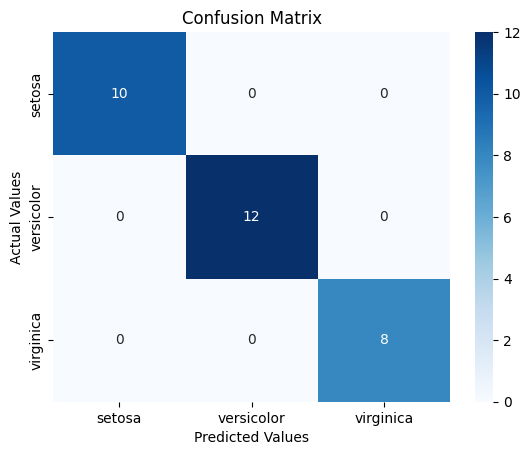

In [57]:
# PLOT the confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
# fmt='d' to show integer values in the heatmap
# cmap='Blues' to use a blue color scheme
# xticklabels=model.classes_ to label the x-axis with the class names
# yticklabels=model.classes_ to label the y-axis with the class names


plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

----

# 2. Support Vector Machine (SVM) for Regression
Support Vector Machine (SVM) can also be used for regression problems. The idea of SVM regression is similar to SVM classification, but instead of trying to find a hyper-plane that separates the classes, we try to find a function that approximates the data points maintaining all the main features that characterize the algorithm (maximal margin). 

For more information on SVM, please refer to the following link:
https://scikit-learn.org/stable/modules/svm.html

In [58]:
# for Regression, we will use SVR (Support Vector Regression)
# import dataset of 'diamonds' from seaborn

df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [60]:
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [61]:
df = df.sample(frac=0.2, random_state=101)  
# take 20% sample of the data for faster processing 'frac=0.2'

In [62]:
# select features and target variable
X = df.drop('price', axis=1)
y = df['price']

In [63]:
# convert categorical variables to numerical using label encoding
label_endcoder = {}
for col in X.select_dtypes(include=['category', 'object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_endcoder[col] = le

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=101)

In [65]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Initialize and train the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [67]:
# NOW PREDICT THE TEST DATA
y_pred = svr_model.predict(X_test)
y_pred

array([3468.82706406, 2541.9075006 , 1648.01776999, ..., 1593.11031717,
       1388.76360005, 2544.95791467], shape=(2158,))

In [68]:
# NOW EVALUATE THE MODEL
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Squared Error (MSE): 13746316.85359256
Root Mean Squared Error (RMSE): 3707.602574925279
Mean Absolute Error (MAE): 2087.5229212047957
R2 Score: 0.15504640339693776
Mean Absolute Percentage Error (MAPE): 0.6296875719374515
